In [1]:
using BenchmarkTools, DataFrames, Plots, StatsPlots, Statistics, Measurements, CSV

In [2]:
function sum_for_column(A)
    s = zero(eltype(A))
    n, m = size(A)
    @assert n == m
    sv = zeros(n)    
    for j in 1:n
        for i in 1:n
            sv[j] += A[i, j]
        end
    end
    for i in 1:n
        s += sv[i]
    end
    return s
end

sum_for_column (generic function with 1 method)

In [3]:
function sum_for_row(A)
    s = zero(eltype(A))
    n, m = size(A)
    @assert n == m
    sv = zeros(n)
    for j in 1:n
        for i in 1:n
            sv[i] += A[i, j]
        end
    end
    for i in 1:n
        s += sv[i]
    end
    return s
end

sum_for_row (generic function with 1 method)

In [4]:
function simple_sum(A)
    s = zero(eltype(A))
    n, m = size(A)
    @assert n == m
    for j in 1:n
        for i in 1:n
            s += A[i, j]
        end
    end
    return s
end

simple_sum (generic function with 1 method)

In [5]:
sizes = range(512, 8192, length=51);

In [6]:
function bench(N)
    A = rand(N, N)
    tc = @benchmark sum_for_column($A)
    tr = @benchmark sum_for_row($A)
    tss = @benchmark simple_sum($A)
    ts = @benchmark sum($A)
    dfc = DataFrame(Size = N, Method = "for_col", Time = tc.times)
    dfr = DataFrame(Size = N, Method = "for_row", Time = tr.times)
    dfss = DataFrame(Size = N, Method = "simple_sum", Time = tss.times)
    dfs = DataFrame(Size = N, Method = "Base.sum", Time = ts.times)
    vcat(dfc, dfr, dfss, dfs)
end

bench (generic function with 1 method)

In [13]:
# df = vcat(map(sizes) do size
#     N = convert(Int64, round(size, digits=0))
#     bench(N)
# end...)
# CSV.write("results.csv", df)

In [14]:
df = CSV.read("results.csv", DataFrame);

In [10]:
df_agg = combine(
    groupby(df, [:Method, :Size]), 
    :Time => (x -> mean(x)±std(x)) => :Mtime
);
transform!(df_agg, :Mtime => (x->x./1e6) => :Mtime);

In [11]:
df_row = filter(:Method => ==("for_row"), df_agg);
df_col = filter(:Method => ==("for_col"), df_agg);
df_ssum = filter(:Method => ==("simple_sum"), df_agg);
df_sum = filter(:Method => ==("Base.sum"), df_agg);

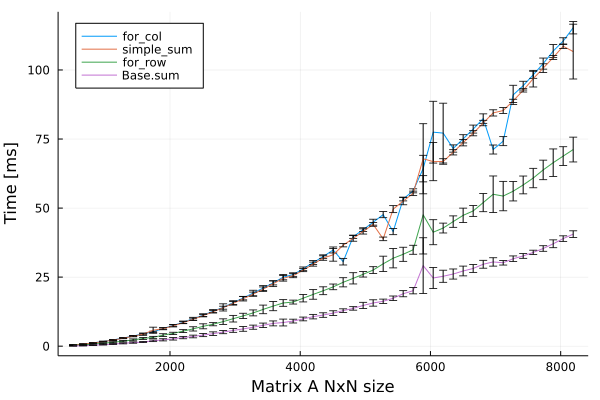

In [23]:
@df df_col plot(:Size, :Mtime, label="for_col", legend=:topleft)
@df df_ssum plot!(:Size, :Mtime, label="simple_sum")
@df df_row plot!(:Size, :Mtime, label="for_row")
@df df_sum plot!(:Size, :Mtime, label="Base.sum")
xlabel!("Matrix A NxN size")
ylabel!("Time [ms]")
# savefig("../../static/posts/how-to-sum-like-a-boss/benchmark.png")

In [25]:
prod([1,2,3])

6